# Preliminary Project - Data Analysis and Visualization
**Group Members:**
- Benjamin Francis Abadila
- Angelo Dela Paz
- Carl Mitzchel Padua
- Edjin Jerney Payumo
- Levin Jacob Sta. Cruz

---
## Setup

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

ImportError: cannot import name 'parse_version' from 'sklearn.utils' (c:\Users\Gelo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\__init__.py)

In [56]:
# 2023 Dataset
fies_23 = pd.read_csv('dataset/PHL-PSA-FIES-2023-V1-PUF/FIES PUF 2023 Volume1.csv')

/var/folders/yd/8dv05t1n6gs9qfmk2n14y_wh0000gn/T/ipykernel_9010/708551984.py:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  fies_23 = pd.read_csv('dataset/PHL-PSA-FIES-2023-V1-PUF/FIES PUF 2023 Volume1.csv')


---
## Data Preprocessing

### Data Inspection

In [57]:
# Show all columns on output
pd.set_option('display.max_columns', None)


In [58]:
fies_23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163268 entries, 0 to 163267
Data columns (total 90 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   W_REGN                        163268 non-null  int64  
 1   W_PROV                        163268 non-null  int64  
 2   SEQ_NO                        163268 non-null  int64  
 3   RPROV                         163268 non-null  int64  
 4   FSIZE                         163268 non-null  float64
 5   REG_SAL                       163268 non-null  int64  
 6   SEASON_SAL                    163268 non-null  int64  
 7   WAGES                         163268 non-null  int64  
 8   NETSHARE                      163268 non-null  int64  
 9   CASH_ABROAD                   163268 non-null  int64  
 10  CASH_DOMESTIC                 163268 non-null  int64  
 11  RENTALS_REC                   163268 non-null  int64  
 12  INTEREST                      163268 non-nul

`'TOTDIS'` is the only object datatype although it should also be numerical 

In [59]:
fies_23.describe()

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
count,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00
mean,9.34,45.67,81634.50,4574.49,4.14,149526.83,28721.10,178247.93,1678.62,24227.86,16255.67,2087.70,261.07,8917.41,927.95,334.38,3147.78,6229.32,13496.45,2298.99,4626.74,387.41,25443.89,2398.01,6584.37,5824.78,367.30,375.80,61811.91,8.17,27286.06,16053.26,14394.01,6144.20,1712.81,4601.02,7037.53,2141.60,4130.66,711.64,2217.82,122.74,438.27,1900.27,1187.45,79.54,1279.17,1983.71,67.00,19.45,1.17,90158.87,11548.75,101707.62,4900.74,54093.33,3653.57,28019.67,89.43,31762.66,6315.29,6971.79,15813.11,7888.64,1988.34,8203.00,6376.15,9065.43,5097.81,6275.71,4889.74,27434.21,218.15,141447.73,332147.28,243155.35,10105.74,342253.02,573.17,168.31,691.46,1.52,95302.56,5.19,5.49,5.56,5.48,5.49,9.71
std,4.75,24.76,47131.56,2482.17,1.97,238460.01,69040.34,249486.30,12392.73,85935.70,29912.19,24827.38,3388.96,60552.16,67510.70,5839.10,6381.12,21557.90,44600.68,40097.95,29852.07,5000.56,225106.39,35315.79,34679.95,82371.68,16729.14,18022.39,266040.51,738.98,12875.67,13694.00,10333.80,6312.40,1549.35,4226.02,5509.89,2031.42,6184.10,1149.47,2066.75,518.25,1170.88,2127.92,1353.82,550.26,2686.72,4540.87,489.89,226.29,68.12,44941.10,19540.10,54935.16,7662.09,59331.42,17902.43,41437.42,6836.89,44227.33,15752.41,26318.06,21239.39,8947.52,9025.93,24212.81,17194.19,10490.74,36984.98,13899.96,26595.90,175215.73,2617.35,158238.92,406065.14,195625.70,109044.32,440624.86,678.97,163.52,783.89,0.50,158543.18,2.90,2.89,2.87,2.87,2.89,4.96
min,1.00,1.00,1.00,100.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-39955.00,-136448.00,-9000.00,-1200.00,-29500.00,-2000.00,-16600.00,-48770.00,-2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3593.50,0.00,1770.00,0.00,0.00,0.00,100.00,118.00,0.00,0.00,0.00,0.00,0.00,0.00,64.00,0.00,0.00,0.00,0.00,0.00,5292.00,14030.00,13967.00,0.00,14030.00,1.00,1.02,0.92,1.00,5240.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,5.00,24.00,40817.75,2402.00,3.00,0.00,0.00,28080.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,460.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18347.00,6740.00,7500.00,2792.00,960.00,2000.00,3807.88,985.00,1670.00,90.00,901.00,0.00,0.00,390.00,378.00,0.00,0.00,0.00,0.00,0.00,0.00,60165.75,500.00,64920.00,

In [60]:
# Identify column that are non-numeric
fies_23.describe(include='O')

,TOTDIS
count,163268
unique,144056
top,
freq,7732


In [61]:
# Convert the TOTDIS column to string for inspection
fies_23['TOTDIS'] = fies_23['TOTDIS'].astype(str)

# Check for null values
null_values_count = fies_23['TOTDIS'].isnull().sum()

# Identify non-numerical entries (including whitespace)
non_numerical_entries = fies_23[~fies_23['TOTDIS'].str.replace('.', '', regex=False).str.isnumeric()]

# Display results
print(f"Number of null values: {null_values_count}")
print(f"Number of non-numerical entries: {len(non_numerical_entries)}")

# Display the non-numerical entries for inspection
print(non_numerical_entries[['TOTDIS']])


Number of null values: 0
Number of non-numerical entries: 7732
             TOTDIS
47648              
47649              
47650              
47651              
47652              
...             ...
148931             
148932             
148933             
148934             
148935             

[7732 rows x 1 columns]


In [62]:
# Strip whitespace from the TOTAL_DISBURSEMENTS column
fies_23['TOTDIS'] = fies_23['TOTDIS'].astype(str)

# Identify and view rows where TOTAL_DISBURSEMENTS contains only whitespace
whitespace_entries = fies_23[fies_23['TOTDIS'].str.strip() == '']

# Display the rows with whitespace in TOTAL_DISBURSEMENTS
whitespace_entries['TOTDIS']


47648                
47649                
47650                
47651                
47652                
             ...     
148931               
148932               
148933               
148934               
148935               
Name: TOTDIS, Length: 7732, dtype: object

All the non-numeric values of column `'TOTDIS'` are whitespaces, probably caused by an encoding error

In [63]:
# Calculating the Missing Values % contribution in DF
df_null = round(100*(fies_23.isnull().sum())/len(fies_23), 2)
df_null

W_REGN       0.00
W_PROV       0.00
SEQ_NO       0.00
RPROV        0.00
FSIZE        0.00
             ... 
RPCINC       0.00
PRPCINC      0.00
PPCINC       0.00
RPCINC_NIR   0.00
W_REGN_NIR   0.00
Length: 90, dtype: float64

In [64]:
df_null[df_null > 0] # Show only columns having Missing Values (non-zero)

Series([], dtype: float64)

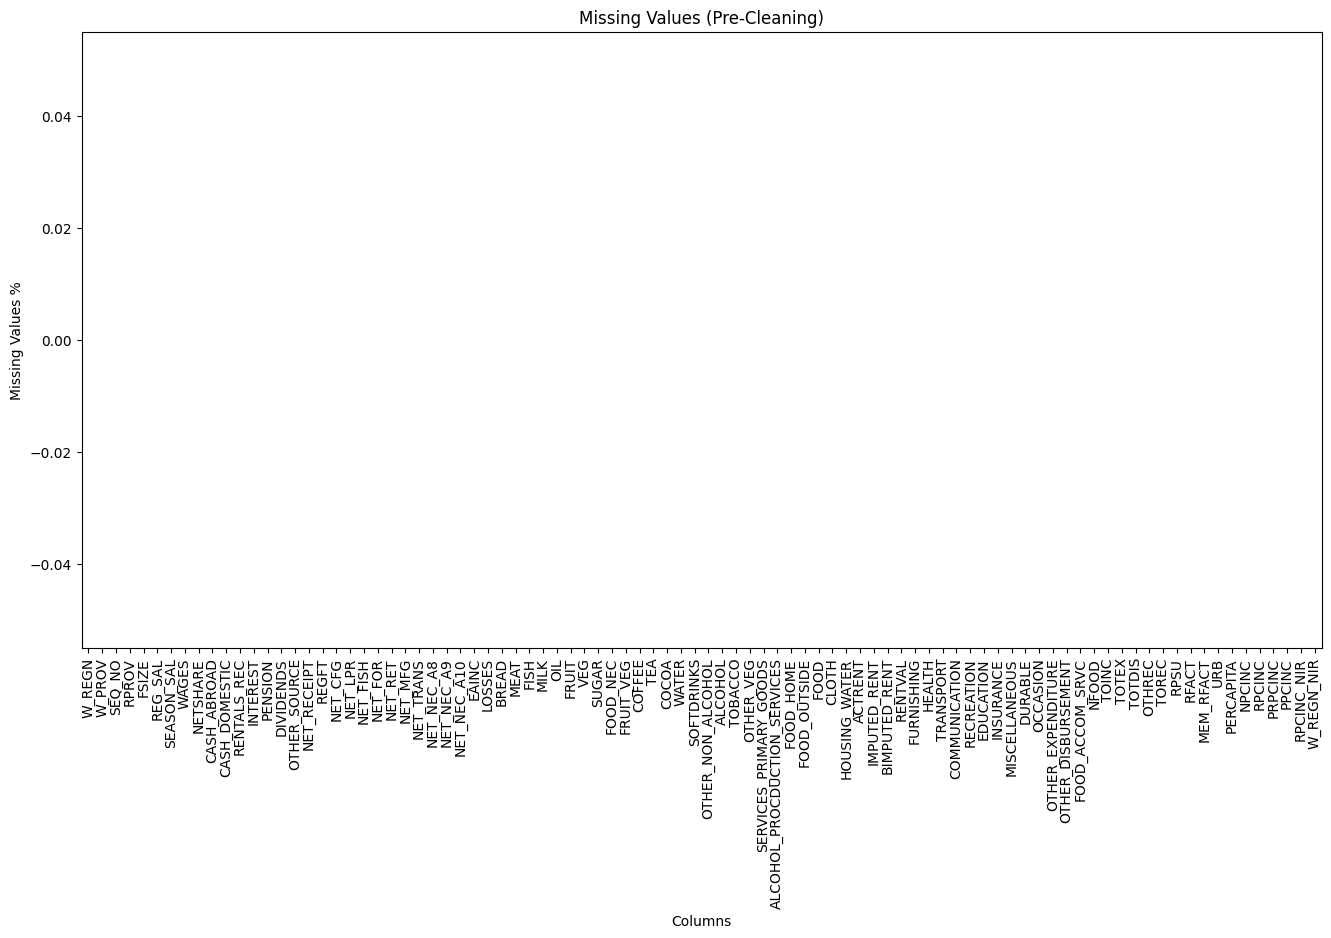

In [65]:
# Plotting the df_null
plt.figure(figsize=(16,8))
sns.barplot(x=df_null.index, y=df_null.values, alpha=0.8)
plt.title('Missing Values (Pre-Cleaning)')
plt.ylabel('Missing Values %')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.show()

There are no identified null values except for the empty whitespaces in `'TOTDIS'`

In [66]:
fies_23.shape

(163268, 90)

In [67]:
fies_23.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'RPROV', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'WAGES', 'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC',
       'INTEREST', 'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT',
       'REGFT', 'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 'NET_RET',
       'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 'NET_NEC_A9', 'NET_NEC_A10',
       'EAINC', 'LOSSES', 'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 'FRUIT',
       'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 'COFFEE', 'TEA', 'COCOA',
       'WATER', 'SOFTDRINKS', 'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO',
       'OTHER_VEG', 'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES',
       'FOOD_HOME', 'FOOD_OUTSIDE', 'FOOD', 'CLOTH', 'HOUSING_WATER',
       'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT', 'RENTVAL', 'FURNISHING',
       'HEALTH', 'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION',
       'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION',
       'OTHER_EXPENDITURE', 'OTHER_DISBURSEME

In [68]:
fies_23

,W_REGN,W_PROV,SEQ_NO,RPROV,FSIZE,REG_SAL,SEASON_SAL,WAGES,NETSHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_SOURCE,NET_RECEIPT,REGFT,NET_CFG,NET_LPR,NET_FISH,NET_FOR,NET_RET,NET_MFG,NET_TRANS,NET_NEC_A8,NET_NEC_A9,NET_NEC_A10,EAINC,LOSSES,BREAD,MEAT,FISH,MILK,OIL,FRUIT,VEG,SUGAR,FOOD_NEC,FRUIT_VEG,COFFEE,TEA,COCOA,WATER,SOFTDRINKS,OTHER_NON_ALCOHOL,ALCOHOL,TOBACCO,OTHER_VEG,SERVICES_PRIMARY_GOODS,ALCOHOL_PROCDUCTION_SERVICES,FOOD_HOME,FOOD_OUTSIDE,FOOD,CLOTH,HOUSING_WATER,ACTRENT,IMPUTED_RENT,BIMPUTED_RENT,RENTVAL,FURNISHING,HEALTH,TRANSPORT,COMMUNICATION,RECREATION,EDUCATION,INSURANCE,MISCELLANEOUS,DURABLE,OCCASION,OTHER_EXPENDITURE,OTHER_DISBURSEMENT,FOOD_ACCOM_SRVC,NFOOD,TOINC,TOTEX,TOTDIS,OTHREC,TOREC,RPSU,RFACT,MEM_RFACT,URB,PERCAPITA,NPCINC,RPCINC,PRPCINC,PPCINC,RPCINC_NIR,W_REGN_NIR
0,1,28,1,2800,2.50,119000,0,119000,0,461000,10000,0,0,0,0,0,4760,310.00,0,0,0,0,0,0,0,0,0,0,0,0,18830.00,57120.00,46820.00,2540.00,1734.00,2410.00,8000.00,1835.00,2244.00,0.00,2250.00,0.00,0.00,1950.00,1820.00,0.00,0.00,0.00,0.00,0,0,147553.00,14000.00,161553.00,510,36840,0,12000,0,12000,5585,1410,7864,3060,0,0,0,8420,0,0,3700,0,0,67389.00,607070.00,228942.00,228942.0,0,607070.00,2,88.54,229.39,2,242828.00,10,10,10,10,10,1
1,1,28,2,2800,6.00,154400,0,154400,0,142000,43000,6000,0,0,0,0,2790,1790.00,0,0,0,0,0,0,0,44000,0,0,44000,0,36323.00,50206.00,43405.00,12500.00,2340.00,4710.00,12115.00,1230.00,2930.00,702.00,5025.00,0.00,960.00,5850.00,6162.00,0.00,1950.00,0.00,0.00,0,0,184458.00,12800.00,197258.00,2010,32080,0,18000,0,18000,12850,1610,19850,18800,75,50,11880,33164,30700,0,800,600,0,165819.00,411980.00,363077.00,363677.0,0,411980.00,2,88.54,550.54,2,68663.34,5,5,2,2,5,1
2,1,28,3,2800,3.50,683452,0,683452,0,37000,28000,9000,0,0,0,0,940,41820.00,0,0,0,0,0,0,0,0,0,0,0,0,27770.00,54160.00,36440.00,11955.00,2364.00,5360.00,13805.00,1470.00,2580.00,0.00,1860.00,0.00,0.00,3900.00,3120.00,0.00,0.00,0.00,0.00,0,0,164784.00,11500.00,176284.00,2440,52860,0,18000,0,18000,12810,2910,29620,12894,0,0,85909,14050,108000,1500,17200,42709,0,340193.00,818212.00,516477.00,559186.0,0,818212.00,2,88.54,321.15,2,233774.86,10,10,10,10,10,1
3,1,28,4,2800,2.50,48200,0,48200,10000,55000,5000,9000,0,0,0,0,2360,24738.00,24240,0,0,0,62000,0,0,0,0,0,86240,0,18272.00,21220.00,20380.00,10490.00,1836.00,2780.00,8240.00,1060.00,1586.00,552.00,1910.00,0.00,0.00,2550.00,1820.00,0.00,0.00,0.00,0.00,0,0,92696.00,10000.00,102696.00,1950,40350,0,18000,0,18000,5418,5054,10560,7800,0,0,0,5690,0,0,920,0,0,77742.00,258538.00,180438.00,180438.0,0,258538.00,2,88.54,229.39,2,103415.20,7,8,5,5,8,1
4,1,28,5,2800,3.00,400994,0,400994,0,108000,5000,0,0,0,0,0,220,850.00,17660,0,0,0,0,0,0,0,0,0,17660,0,27020.00,64250.00,45770.00,3320.00,1056.00,2020.00,7145.00,1150.00,2140.00,552.00,2130.00,0.00,0.00,3900.00,2730.00,0.00,0.00,0.00,0.00,0,0,163183.00,8000.00,171183.00,1700,62250,0,18000,0,18000,14920,2565,48960,25860,220,0,44760,13620,0,0,4400,46524,0,219255.00,550724.00,390438.00,436962.0,2000,552724.00,2,88.54,275.27,2,183574.67,9,10,9,9,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163263,17,59,163264,5900,3.00,42600,5984,48584,0,0,8700,0,0,0,0,0,4780,300.00,30280,0,11340,0,0,0,0,0,0,0,41620,0,16815.00,8650.00,8969.00,3260.00,1040.00,2030.00,3530.00,2990.00,2360.00,204.00,1560.00,0.00,3744.00,1690.00,450.00,0.00,0.00,0.00,0.00,0,0,57292.00,3800.00,61092.00,4695,21300,0,12000,0,12000,3365,60,9600,2500,1050,260,0,4809,0,1000,600,0,0,49239.00,115984.00,110331.00,110331.0,0,115984.00,326,52.36,159.71,2,38661.33,2,3,4,4,3,17
163264,17,59,163265,5900,7.00,117600,56800,174400,0,0,0,0,0,0,0,0,4290,0.00,0,0,62630,0,0,0,0,0,0,0,62630,0,34916.00,20015.0

### Data Cleaning

In [69]:
# Convert TOTDIS to string to check for whitespaces
fies_23['TOTDIS'] = fies_23['TOTDIS'].astype(str)

# Identify rows where TOTDIS contains only whitespace
whitespace_rows = fies_23[fies_23['TOTDIS'].str.strip() == '']

# Compute the new values for TOTDIS
fies_23.loc[whitespace_rows.index, 'TOTDIS'] = (
    fies_23.loc[whitespace_rows.index, 'TOTEX'] + 
    fies_23.loc[whitespace_rows.index, 'OTHER_DISBURSEMENT']
)

# Convert TOTDIS back to numeric type
fies_23['TOTDIS'] = pd.to_numeric(fies_23['TOTDIS'], errors='coerce')

# Display the updated DataFrame for verification
print(fies_23[['TOTDIS', 'TOTEX', 'OTHER_DISBURSEMENT']].head())

     TOTDIS     TOTEX  OTHER_DISBURSEMENT
0 228942.00 228942.00                   0
1 363677.00 363077.00                 600
2 559186.00 516477.00               42709
3 180438.00 180438.00                   0
4 436962.00 390438.00               46524


Since `TOTDIS` = `TOTEX` + `OTHER_DISBURSEMENT`, we used the data on these two columns to recompute the rows in `TOTDIS` containing whitespaces  

In [70]:
# Convert the TOTDIS column to string for inspection
fies_23['TOTDIS'] = fies_23['TOTDIS'].astype(str)

# Identify non-numerical entries (including whitespace)
non_numerical_entries = fies_23[~fies_23['TOTDIS'].str.replace('.', '', regex=False).str.isnumeric()]

# Display results
print(f"Number of non-numerical entries: {len(non_numerical_entries)}")

Number of non-numerical entries: 0


In [71]:
# Dropping Unnecessary Columns
cleaned_fies = fies_23.copy()

In [72]:
# Drop Entrepreneurial Activity Component Columns
# The column EAINC, which is the total of these components will be used instead
cleaned_fies.drop(columns=[
    'NET_CFG', 'NET_LPR', 'NET_FISH', 'NET_FOR', 
    'NET_RET', 'NET_MFG', 'NET_TRANS', 'NET_NEC_A8', 
    'NET_NEC_A9', 'NET_NEC_A10'
], inplace=True)


In [73]:
# Drop Food Component Columns
# The column FOOD, which is the total of these components will be used instead
cleaned_fies.drop(columns=[
    'BREAD', 'MEAT', 'FISH', 'MILK', 'OIL', 
    'FRUIT', 'VEG', 'SUGAR', 'FOOD_NEC', 'FRUIT_VEG', 
    'COFFEE', 'TEA', 'COCOA', 'WATER', 'SOFTDRINKS', 
    'OTHER_NON_ALCOHOL', 'ALCOHOL', 'TOBACCO', 'OTHER_VEG', 
    'SERVICES_PRIMARY_GOODS', 'ALCOHOL_PROCDUCTION_SERVICES', 
    'FOOD_HOME', 'FOOD_OUTSIDE'
], inplace=True)

In [74]:
# Drop Non-Food Component Columns
# The column NFOOD, which is the total of these components will be used instead
cleaned_fies.drop(columns=[
    'CLOTH', 'HOUSING_WATER', 'FURNISHING', 'HEALTH', 
    'TRANSPORT', 'COMMUNICATION', 'RECREATION', 'EDUCATION', 
    'INSURANCE', 'MISCELLANEOUS', 'DURABLE', 'OCCASION', 
    'OTHER_EXPENDITURE'
], inplace=True)

In [75]:
# Drop Other Unnecessary Columns
cleaned_fies.drop(columns=[
    'RPROV','WAGES','LOSSES', 'ACTRENT', 'IMPUTED_RENT', 'BIMPUTED_RENT',
    'FOOD_ACCOM_SRVC', 'RPSU', 'RFACT', 'MEM_RFACT', 'NPCINC', 
    'RPCINC', 'PRPCINC', 'PPCINC', 'RPCINC_NIR', 
    'W_REGN_NIR'
], inplace=True)


In [76]:
cleaned_fies.columns

Index(['W_REGN', 'W_PROV', 'SEQ_NO', 'FSIZE', 'REG_SAL', 'SEASON_SAL',
       'NETSHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 'RENTALS_REC', 'INTEREST',
       'PENSION', 'DIVIDENDS', 'OTHER_SOURCE', 'NET_RECEIPT', 'REGFT', 'EAINC',
       'FOOD', 'RENTVAL', 'OTHER_DISBURSEMENT', 'NFOOD', 'TOINC', 'TOTEX',
       'TOTDIS', 'OTHREC', 'TOREC', 'URB', 'PERCAPITA'],
      dtype='object')

In [77]:
# Standardize Column Names
cleaned_fies.rename(
    columns={
        "W_REGN": "REGION",
        "W_PROV": "PROVINCE",
        "SEQ_NO": "FAMILY_ID",
        "FSIZE": "FAMILY_SIZE",
        "NETSHARE": "NET_SHARE",
        "OTHER_SOURCE": "OTHER_INCOME_SOURCE",
        "REGFT": "GIFT_RECEIPTS",
        "EAINC": "ENTREP_INCOME",
        "FOOD": "FOOD_EXPENSES",
        "NFOOD": "NON_FOOD_EXPENSES",
        "TOINC": "TOTAL_INCOME",
        "TOTEX": "TOTAL_EXPENSES",
        "TOTDIS": "TOTAL_DISBURSEMENTS",
        "OTHREC": "OTHER_RECEIPTS",
        "TOREC": "TOTAL_RECEIPTS",
        "URB": "AREA_CLASS",
        "PERCAPITA": "PCAPITA_INCOME",
    },
    inplace=True,
)

In [78]:
cleaned_fies.columns

Index(['REGION', 'PROVINCE', 'FAMILY_ID', 'FAMILY_SIZE', 'REG_SAL',
       'SEASON_SAL', 'NET_SHARE', 'CASH_ABROAD', 'CASH_DOMESTIC',
       'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS',
       'OTHER_INCOME_SOURCE', 'NET_RECEIPT', 'GIFT_RECEIPTS', 'ENTREP_INCOME',
       'FOOD_EXPENSES', 'RENTVAL', 'OTHER_DISBURSEMENT', 'NON_FOOD_EXPENSES',
       'TOTAL_INCOME', 'TOTAL_EXPENSES', 'TOTAL_DISBURSEMENTS',
       'OTHER_RECEIPTS', 'TOTAL_RECEIPTS', 'AREA_CLASS', 'PCAPITA_INCOME'],
      dtype='object')

In [79]:
cleaned_fies.shape

(163268, 28)

In [80]:
cleaned_fies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163268 entries, 0 to 163267
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   REGION               163268 non-null  int64  
 1   PROVINCE             163268 non-null  int64  
 2   FAMILY_ID            163268 non-null  int64  
 3   FAMILY_SIZE          163268 non-null  float64
 4   REG_SAL              163268 non-null  int64  
 5   SEASON_SAL           163268 non-null  int64  
 6   NET_SHARE            163268 non-null  int64  
 7   CASH_ABROAD          163268 non-null  int64  
 8   CASH_DOMESTIC        163268 non-null  int64  
 9   RENTALS_REC          163268 non-null  int64  
 10  INTEREST             163268 non-null  int64  
 11  PENSION              163268 non-null  int64  
 12  DIVIDENDS            163268 non-null  int64  
 13  OTHER_INCOME_SOURCE  163268 non-null  int64  
 14  NET_RECEIPT          163268 non-null  int64  
 15  GIFT_RECEIPTS    

### Data Engineering

Classifying incomes into different social classes based on the defined thresholds

*References*
- https://www.moneymax.ph/personal-finance/articles/social-class-philippines
- https://psa.gov.ph/statistics/poverty

In [81]:
poverty_threshold = 13873 * 12  # Official poverty threshold (Annual)

def classify_income(row):
    total_income = row['TOTAL_INCOME']
    if total_income < poverty_threshold:
        return 'Poor'
    elif total_income < 2 * poverty_threshold:
        return 'Low income'
    elif total_income < 4 * poverty_threshold:
        return 'Lower-middle income'
    elif total_income < 7 * poverty_threshold:
        return 'Middle income'
    elif total_income < 12 * poverty_threshold:
        return 'Upper-middle income'
    elif total_income < 20 * poverty_threshold:
        return 'Upper income'
    else:
        return 'Rich'

cleaned_fies['SOCIAL_CLASS'] = cleaned_fies.apply(classify_income, axis=1)
print(cleaned_fies[['TOTAL_INCOME', 'SOCIAL_CLASS']].head())


   TOTAL_INCOME         SOCIAL_CLASS
0     607070.00  Lower-middle income
1     411980.00  Lower-middle income
2     818212.00        Middle income
3     258538.00           Low income
4     550724.00  Lower-middle income


Calculates the net savings for each individual by subtracting their total expenses (`TOTAL_EXPENSES`) from their total income (`TOTAL_INCOME`) and stores the result in a new column called `NET_SAVINGS` in the `cleaned_fies` DataFrame.

In [82]:
cleaned_fies['NET_SAVINGS'] = cleaned_fies['TOTAL_INCOME'] - cleaned_fies['TOTAL_EXPENSES']

In [83]:
cleaned_fies.columns

Index(['REGION', 'PROVINCE', 'FAMILY_ID', 'FAMILY_SIZE', 'REG_SAL',
       'SEASON_SAL', 'NET_SHARE', 'CASH_ABROAD', 'CASH_DOMESTIC',
       'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS',
       'OTHER_INCOME_SOURCE', 'NET_RECEIPT', 'GIFT_RECEIPTS', 'ENTREP_INCOME',
       'FOOD_EXPENSES', 'RENTVAL', 'OTHER_DISBURSEMENT', 'NON_FOOD_EXPENSES',
       'TOTAL_INCOME', 'TOTAL_EXPENSES', 'TOTAL_DISBURSEMENTS',
       'OTHER_RECEIPTS', 'TOTAL_RECEIPTS', 'AREA_CLASS', 'PCAPITA_INCOME',
       'SOCIAL_CLASS', 'NET_SAVINGS'],
      dtype='object')

In [84]:
cleaned_fies.describe()

,REGION,PROVINCE,FAMILY_ID,FAMILY_SIZE,REG_SAL,SEASON_SAL,NET_SHARE,CASH_ABROAD,CASH_DOMESTIC,RENTALS_REC,INTEREST,PENSION,DIVIDENDS,OTHER_INCOME_SOURCE,NET_RECEIPT,GIFT_RECEIPTS,ENTREP_INCOME,FOOD_EXPENSES,RENTVAL,OTHER_DISBURSEMENT,NON_FOOD_EXPENSES,TOTAL_INCOME,TOTAL_EXPENSES,OTHER_RECEIPTS,TOTAL_RECEIPTS,AREA_CLASS,PCAPITA_INCOME,NET_SAVINGS
count,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00,163268.00
mean,9.34,45.67,81634.50,4.14,149526.83,28721.10,1678.62,24227.86,16255.67,2087.70,261.07,8917.41,927.95,334.38,3147.78,6229.32,61811.91,101707.62,31762.66,27434.21,141447.73,332147.28,243155.35,10105.74,342253.02,1.52,95302.56,88991.93
std,4.75,24.76,47131.56,1.97,238460.01,69040.34,12392.73,85935.70,29912.19,24827.38,3388.96,60552.16,67510.70,5839.10,6381.12,21557.90,266040.51,54935.16,44227.33,175215.73,158238.92,406065.14,195625.70,109044.32,440624.86,0.50,158543.18,286775.50
min,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3593.50,100.00,0.00,5292.00,14030.00,13967.00,0.00,14030.00,1.00,5240.00,-5174102.00
25%,5.00,24.00,40817.75,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,460.00,0.00,64920.00,10500.00,0.00,58990.00,162539.00,131751.75,0.00,166580.00,1.00,42262.07,13908.55
50%,10.00,46.00,81634.50,4.00,72000.00,0.00,0.00,0.00,6200.00,0.00,0.00,0.00,0.00,0.00,510.00,1960.00,18000.00,89869.00,21000.00,0.00,97235.50,241080.00,191325.25,0.00,247525.50,2.00,65525.17,42426.38
75%,13.00,70.00,122451.25,5.00,202200.00,42572.50,0.00,2000.00,21000.00,0.00,0.00,0.00,0.00,0.00,4000.00,5666.25,80800.00,124996.00,39000.00,12990.00,168860.25,389478.00,293141.12,1500.00,398360.00,2.00,109400.20,102597.62
max,17.00,98.00,163268.00,23.50,15476400.00,17000000.00,1200000.00,4500000.00,2000000.00,3900000.00,350000.00,5100000.00,20000000.00,800000.00,300000.00,2667530.00,80944310.00,1363779.00,3600000.00,37048000.00,8231734.00,82461199.00,8707474.50,26440000.00,86661199.00,2.00,41230600.00,77005008.00


## Exploratory Data Analysis

In [85]:
# Create the separate DataFrame for income analysis
income_columns = [
    'REG_SAL', 'SEASON_SAL', 'NET_SHARE', 'CASH_ABROAD', 'CASH_DOMESTIC', 
    'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS', 
    'OTHER_INCOME_SOURCE', 'NET_RECEIPT', 'GIFT_RECEIPTS', 
    'ENTREP_INCOME', 'RENTVAL', 'TOTAL_INCOME'
]

# Create income_df with only the income-related columns
income_df = cleaned_fies[income_columns]

In [86]:
income_df.columns

Index(['REG_SAL', 'SEASON_SAL', 'NET_SHARE', 'CASH_ABROAD', 'CASH_DOMESTIC',
       'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS',
       'OTHER_INCOME_SOURCE', 'NET_RECEIPT', 'GIFT_RECEIPTS', 'ENTREP_INCOME',
       'RENTVAL', 'TOTAL_INCOME'],
      dtype='object')

In [87]:
income_df.shape

(163268, 15)

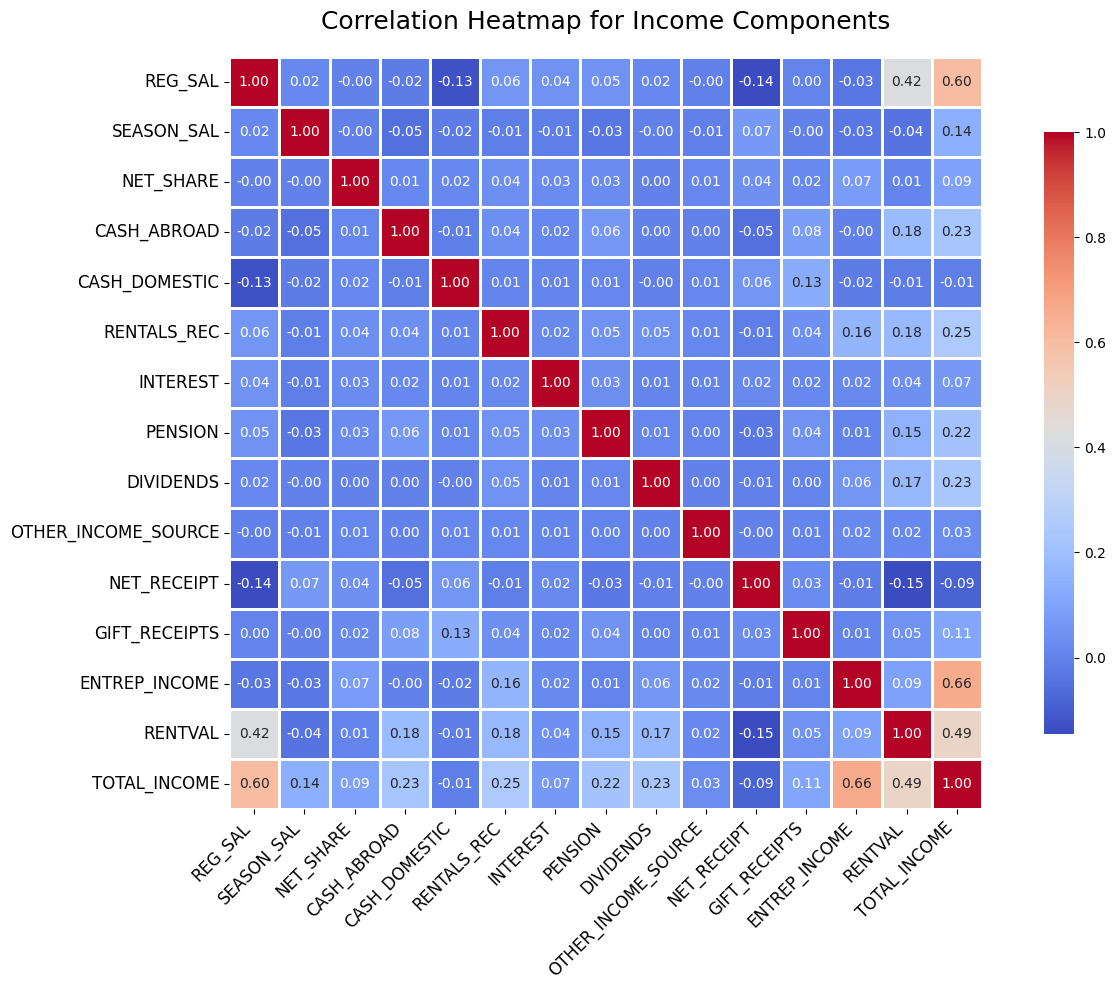

In [88]:
# Correlation heatmap 
plt.figure(figsize=(14, 10)) 
sns.heatmap(
    income_df.corr(),
    annot=True,      
    cmap='coolwarm',  
    linewidths=1,     
    linecolor='white', 
    cbar_kws={'shrink': 0.8}, 
    square=True,    
    fmt='.2f',     
    annot_kws={'size': 10}  
)

plt.title('Correlation Heatmap for Income Components', fontsize=18, pad=20)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Display the heatmap
plt.tight_layout()  
plt.show()

>**Analysis**:
Entrepreneurial income and regular salary show the strongest correlations with total income (0.66 and 0.60 respectively), highlighting their significance in overall household finances.
Rental value moderately correlates with total income and regular salary, suggesting a link between housing value and income levels.
Most other income components show weak correlations, indicating diverse and independent income sources across the population.

In [89]:
# List of columns to drop (income components, except for TOTAL_INCOME)
columns_to_drop = [
    'REG_SAL', 'SEASON_SAL', 'NET_SHARE', 'CASH_ABROAD', 'CASH_DOMESTIC',
    'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS',
    'OTHER_INCOME_SOURCE', 'NET_RECEIPT', 'GIFT_RECEIPTS', 
    'ENTREP_INCOME', 'RENTVAL'
]

# Drop the component columns from cleaned_fies, keeping TOTAL_INCOME
cleaned_fies = cleaned_fies.drop(columns=columns_to_drop)

In [90]:
cleaned_fies.columns

Index(['REGION', 'PROVINCE', 'FAMILY_ID', 'FAMILY_SIZE', 'FOOD_EXPENSES',
       'OTHER_DISBURSEMENT', 'NON_FOOD_EXPENSES', 'TOTAL_INCOME',
       'TOTAL_EXPENSES', 'TOTAL_DISBURSEMENTS', 'OTHER_RECEIPTS',
       'TOTAL_RECEIPTS', 'AREA_CLASS', 'PCAPITA_INCOME', 'SOCIAL_CLASS',
       'NET_SAVINGS'],
      dtype='object')

/var/folders/yd/8dv05t1n6gs9qfmk2n14y_wh0000gn/T/ipykernel_9010/3235368488.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr_fies['SOCIAL_CLASS'] = corr_fies['SOCIAL_CLASS'].replace(social_class_mapping)


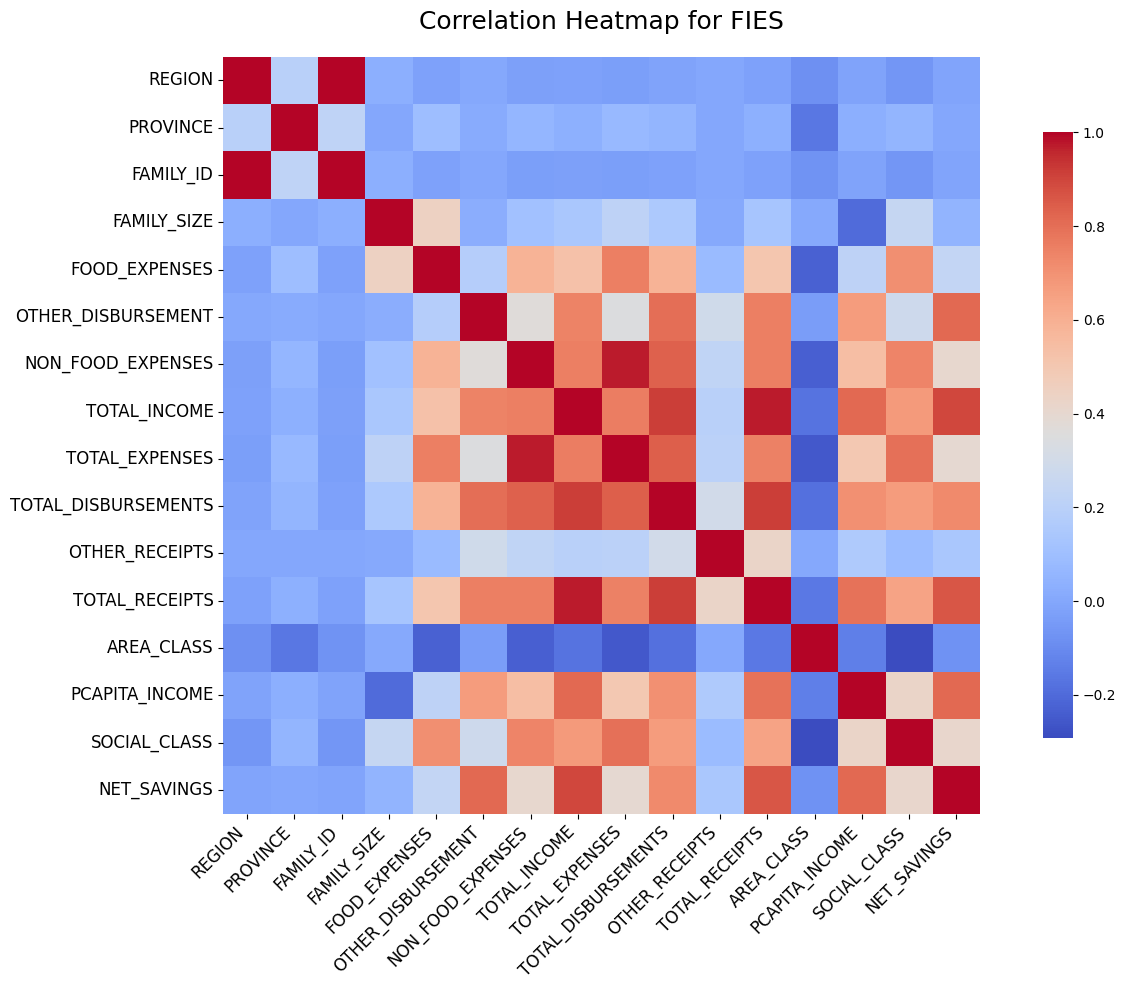

In [91]:
# Correlation heatmap
plt.figure(figsize=(14, 10)) 

# Convert 'SOCIAL_CLASS' into numerical values
social_class_mapping = {
    'Poor': 1,
    'Low income': 2,
    'Lower-middle income': 3,
    'Middle income': 4,
    'Upper-middle income': 5,
    'Upper income': 6,
    'Rich': 7
}

corr_fies = cleaned_fies.copy()

corr_fies['SOCIAL_CLASS'] = corr_fies['SOCIAL_CLASS'].replace(social_class_mapping)

sns.heatmap(
    corr_fies.corr(), 
    annot=False,        
    cmap='coolwarm',
    linewidths=0,    
    square=True,      
    cbar_kws={'shrink': 0.8} 
)

plt.title('Correlation Heatmap for FIES', fontsize=18, pad=20)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Display the heatmap
plt.tight_layout()  
plt.show()

>**Analysis**:
Total income, expenses, and disbursements are highly correlated, as expected in household finances.
Family size positively correlates with food expenses and other disbursements, indicating higher expenses for larger families.
Geographic factors (region and province) show little correlation with financial metrics, suggesting economic status isn't strongly tied to specific areas.
Area classification shows some correlation with financial metrics, hinting at economic differences between urban and rural areas.
Net savings correlate positively with total income and negatively with expenses, but not extremely strongly, suggesting varied saving behaviors across income levels.

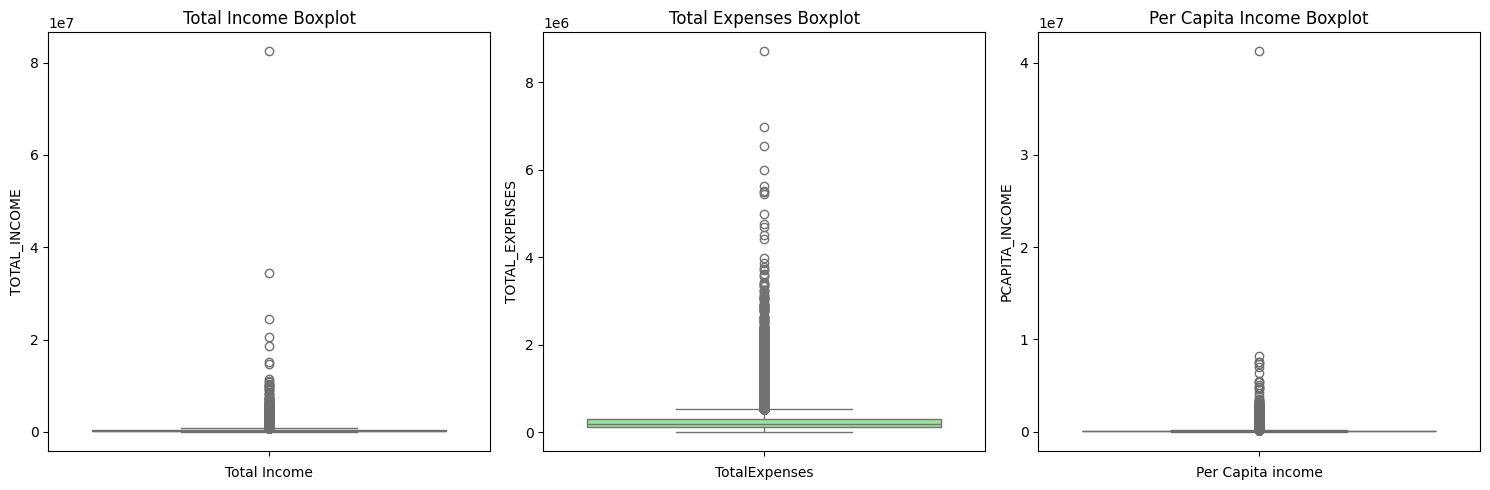

In [92]:
# Boxplot to identify outliers in the dataset

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=cleaned_fies['TOTAL_INCOME'], color='skyblue')
plt.title('Total Income Boxplot')
plt.xlabel('Total Income')

plt.subplot(1, 3, 2)
sns.boxplot(data=cleaned_fies['TOTAL_EXPENSES'], color='lightgreen')
plt.title('Total Expenses Boxplot')
plt.xlabel('TotalExpenses')

plt.subplot(1, 3, 3)
sns.boxplot(data=cleaned_fies['PCAPITA_INCOME'], color='salmon')
plt.title('Per Capita Income Boxplot')
plt.xlabel('Per Capita income')

plt.tight_layout()
plt.show()

In [93]:
# Set display options
pd.set_option('display.float_format', '{:.2f}'.format)

# Getting descriptive statistics for the NET_SAVINGS column
cleaned_fies['NET_SAVINGS'].describe()

count     163268.00
mean       88991.93
std       286775.50
min     -5174102.00
25%        13908.55
50%        42426.38
75%       102597.62
max     77005008.00
Name: NET_SAVINGS, dtype: float64

`NET_SAVINGS` has a minimum value of -5174102.00 and a maximum value of 77005008.00

In [94]:
# Assuming cleaned_fies is your DataFrame
# Sort the DataFrame by NET_SAVINGS in descending order
sorted_fies = cleaned_fies.sort_values(by='NET_SAVINGS', ascending=False)

# Display the top 10 rows of the sorted DataFrame
sorted_fies.head(10)


,REGION,PROVINCE,FAMILY_ID,FAMILY_SIZE,FOOD_EXPENSES,OTHER_DISBURSEMENT,NON_FOOD_EXPENSES,TOTAL_INCOME,TOTAL_EXPENSES,TOTAL_DISBURSEMENTS,OTHER_RECEIPTS,TOTAL_RECEIPTS,AREA_CLASS,PCAPITA_INCOME,SOCIAL_CLASS,NET_SAVINGS
103713,12,65,103714,2.00,217506.00,37048000,5238685.00,82461199.00,5456191.00,42504191.0,4200000,86661199.00,1,41230600.00,Rich,77005008.00
36780,5,16,36781,10.00,517708.00,27388000,5110472.00,34363368.00,5628180.00,33016180.0,0,34363368.00,2,3436336.75,Rich,28735188.00
122969,13,76,122970,2.50,246113.50,18000000,1733384.00,20607600.00,1979497.50,19979497.5,0,20607600.00,1,8243040.00,Rich,18628102.50
91780,11,24,91781,4.50,562646.00,12550000,5971122.00,24401730.00,6533768.00,19083768.0,17000000,41401730.00,1,5422606.50,Rich,17867962.00
37696,5,17,37697,4.00,368781.00,0,2179138.00,18528120.00,2547919.00,2547919.0,0,18528120.00,1,4632030.00,Rich,15980201.00
159209,17,53,159210,2.00,112407.75,12000000,505388.00,15164400.00,617795.75,12617795.75,0,15164400.00,1,7582200.00,Rich,14546604.25
159348,17,53,159349,2.00,202011.00,6600000,2589290.00,14584600.00,2791301.00,9391301.0,2400000,16984600.00,1,7292300.00,Rich,11793299.00
48690,6,30,48691,2.00,156038.00,6350000,658106.00,9632400.00,814144.00,7164144.0,0,9632400.00,1,4816200.00,Rich,8818256.00
151505,16,67,151506,6.00,495471.00,0,1819519.00,10936770.00,2314990.00,2314990.0,0,10936770.00,1,1822795.00,Rich,8621780.00
84400,10,35,84401,9.50,311930.50,7982426,1136438.00,9841229.00,1448368.50,9430794.5,0,9841229.00,1,1035918.81,Rich,8392860.50


## Data Visualization

In [95]:
social_class_order = [
    "Poor",
    "Low income",
    "Lower-middle income",
    "Middle income",
    "Upper-middle income",
    "Upper income",
    "Rich",
]

/var/folders/yd/8dv05t1n6gs9qfmk2n14y_wh0000gn/T/ipykernel_9010/561216763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


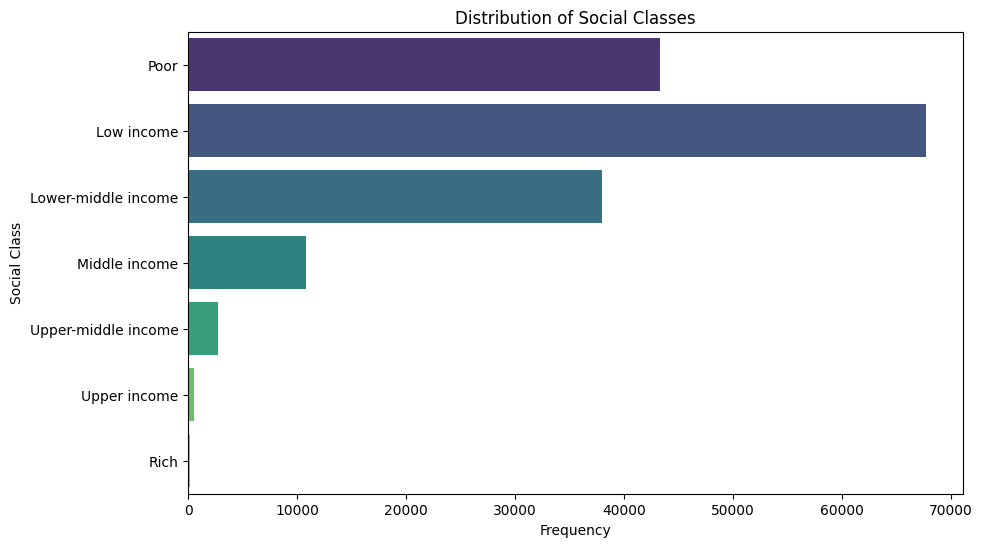

In [96]:
plt.figure(figsize=(10, 6))
sns.countplot(
    y="SOCIAL_CLASS",
    data=cleaned_fies,
    palette="viridis",
    order=social_class_order,
)
plt.title('Distribution of Social Classes')
plt.xlabel('Frequency')
plt.ylabel('Social Class')
plt.show()

>**Analysis**:
Majority of the households in PH are part of the low income and poor classes, indicating prevalence of poverty and other issues such as income inequality

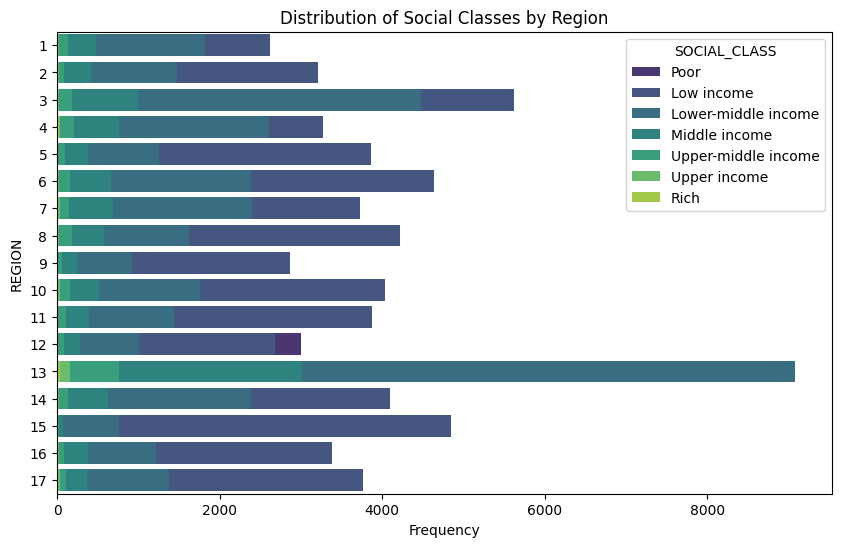

In [97]:
# Distribution of Social Classes grouped by Region
plt.figure(figsize=(10, 6))
sns.countplot(
    y="REGION",
    data=cleaned_fies,
    hue="SOCIAL_CLASS",
    palette="viridis",
    hue_order=social_class_order,
    order=sorted(cleaned_fies["REGION"].unique()),
    dodge=False
)
plt.title("Distribution of Social Classes by Region")
plt.xlabel("Frequency")
plt.show()

>**Analysis**:
The chart illustrates substantial regional variations in social class distribution, with some areas showing a more diverse mix of income groups while others are dominated by specific social classes.

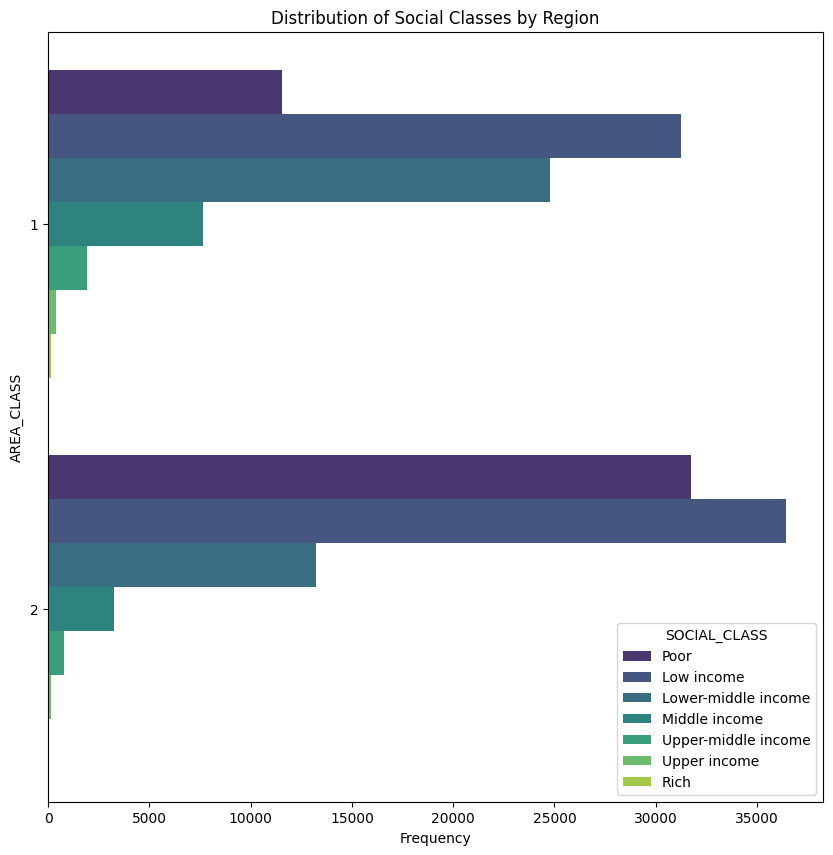

In [98]:
# Distribution of Social Classes grouped by Region
plt.figure(figsize=(10, 10))
sns.countplot(y="AREA_CLASS", data=cleaned_fies, hue="SOCIAL_CLASS", hue_order=social_class_order, palette="viridis")
plt.title("Distribution of Social Classes by Region")
plt.xlabel("Frequency")
plt.show()

>**Analysis**:
Differences in social class distribution between urban (`AREA_CLASS = 1`) and rural areas (`AREA_CLASS = 2`), with rural regions showing higher proportions of poor and low-income groups, while urban areas demonstrate a more balanced distribution across various income levels.

/var/folders/yd/8dv05t1n6gs9qfmk2n14y_wh0000gn/T/ipykernel_9010/227850315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


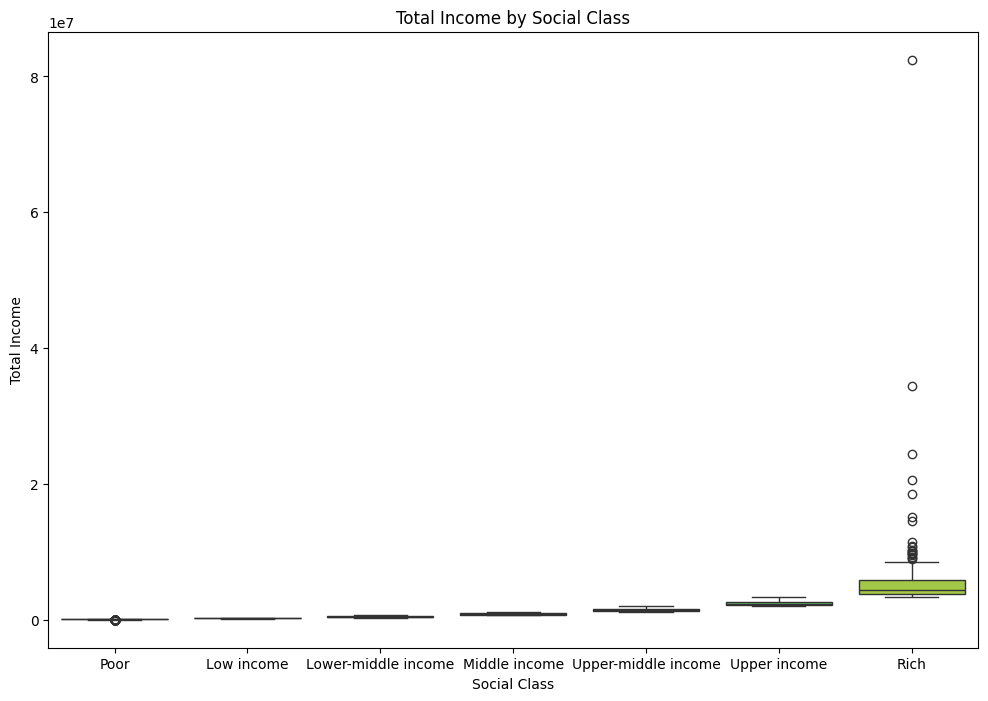

In [99]:
# Graph for Total Income by Social Class
plt.figure(figsize=(12, 8))
sns.boxplot(
    x="SOCIAL_CLASS",
    y="TOTAL_INCOME",
    data=cleaned_fies,
    palette="viridis",
    order=social_class_order,
)
plt.title('Total Income by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Total Income')
plt.show()

>**Analysis**:
Income inequality across social classes, with the "Rich" category showing significantly higher and more varied incomes. There's a clear upward trend in income levels from "Poor" to "Rich", with the gap between classes widening as we move up the social ladder. The lower income classes show very compressed distributions, while upper classes, especially the "Rich", display wide ranges and numerous high-income outliers.

/var/folders/yd/8dv05t1n6gs9qfmk2n14y_wh0000gn/T/ipykernel_9010/2009067284.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


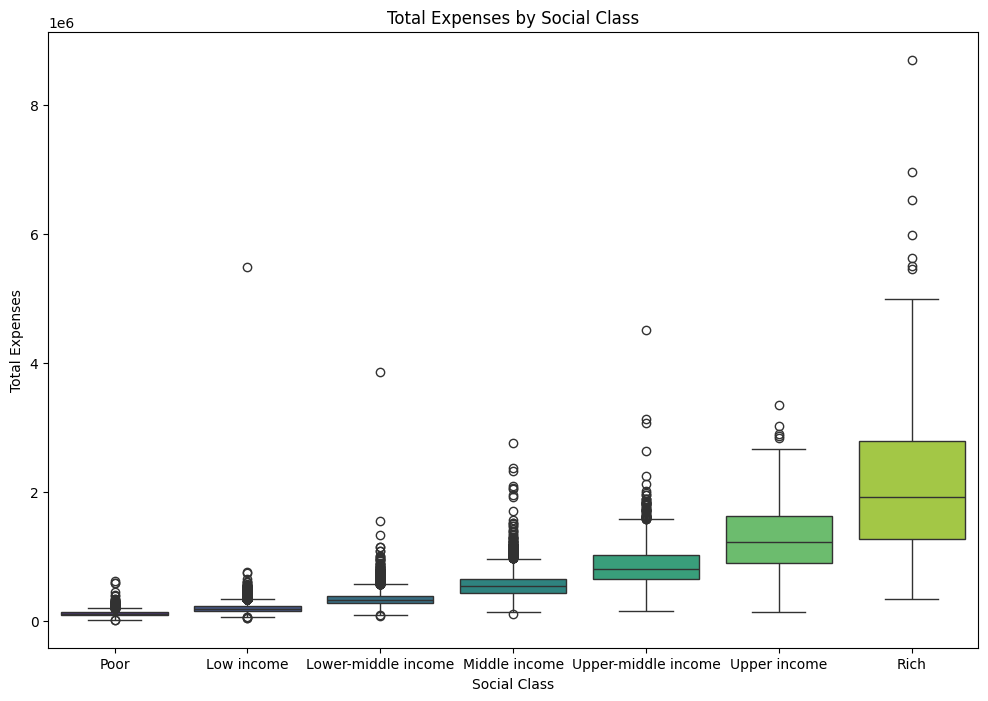

In [100]:
# Graph for Total Expenses by Social Class
plt.figure(figsize=(12, 8))
sns.boxplot(
    x="SOCIAL_CLASS",
    y="TOTAL_EXPENSES",
    data=cleaned_fies,
    palette="viridis",
    order=social_class_order,
)
plt.title("Total Expenses by Social Class")
plt.xlabel("Social Class")
plt.ylabel("Total Expenses")
plt.show()

>**Analysis**:
The expense plot, while following a similar trend, shows less dramatic differences between classes, suggesting that while income varies greatly, expenses don't increase as sharply across social classes.

/var/folders/yd/8dv05t1n6gs9qfmk2n14y_wh0000gn/T/ipykernel_9010/2134833058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


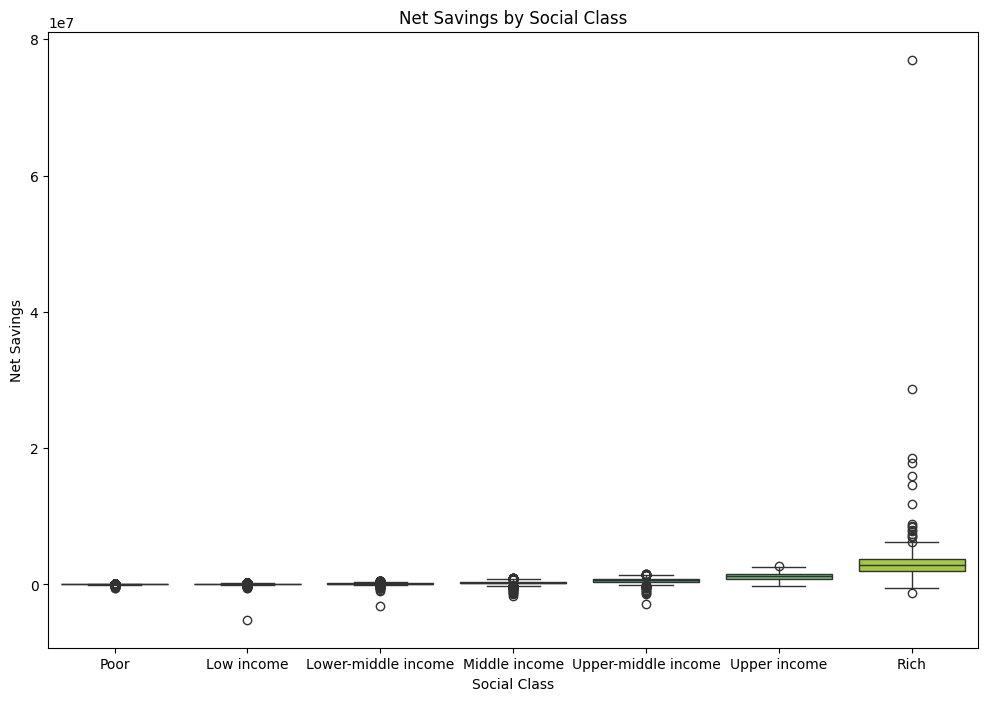

In [101]:
# Graph for Net Savings by Social Class
plt.figure(figsize=(12, 8))
sns.boxplot(
    x="SOCIAL_CLASS",
    y="NET_SAVINGS",
    data=cleaned_fies,
    palette="viridis",
    order=social_class_order,
)
plt.title("Net Savings by Social Class")
plt.xlabel("Social Class")
plt.ylabel("Net Savings")
plt.show()

>**Analysis**:
Lower income groups show minimal savings capacity with compressed distributions near zero. As we move up the social ladder, there's a clear upward trend in net savings, with the "Rich" category displaying significantly higher median savings and a much wider distribution. Upper income classes, especially the "Rich", exhibit numerous high-value outliers, indicating substantial savings potential. However, the presence of negative outliers across most classes suggests that instances of debt or negative savings occur at all social levels, though more pronounced in lower income groups.

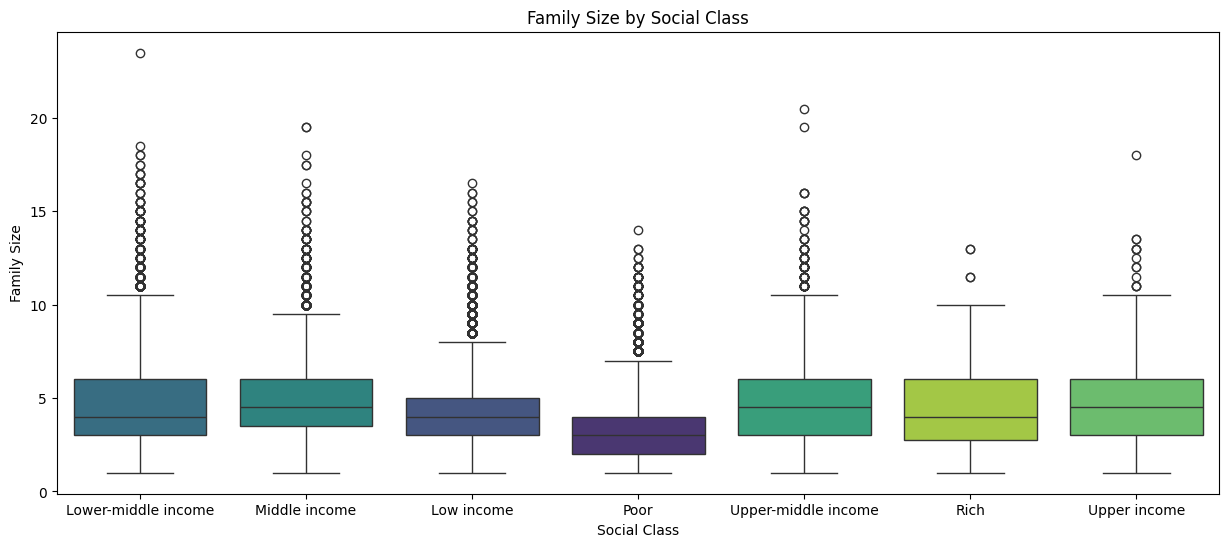

In [102]:
# Graph for Family Size by Social Class
plt.figure(figsize=(15, 6))
sns.boxplot(
    y="FAMILY_SIZE", x="SOCIAL_CLASS", data=cleaned_fies, hue="SOCIAL_CLASS", palette="viridis", legend=False, hue_order=social_class_order
)

plt.title('Family Size by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Family Size')
plt.show()


>**Insights**:
`FAMILY_SIZE` does not change significantly throughout all `SOCIAL_CLASS` except for `POOR` 

### Demographic Visualization

/var/folders/yd/8dv05t1n6gs9qfmk2n14y_wh0000gn/T/ipykernel_9010/507316250.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="REGION", data=cleaned_fies, palette="viridis")


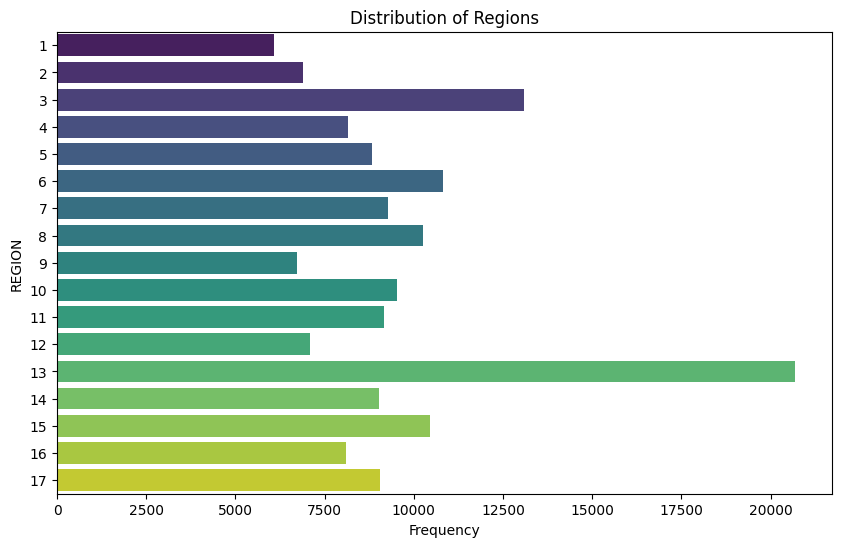

In [103]:
# Distribution of Regions
plt.figure(figsize=(10, 6))
sns.countplot(y="REGION", data=cleaned_fies, palette="viridis")
plt.title("Distribution of Regions")
plt.xlabel("Frequency")
plt.show()

>**Insights**:
NCR has the most number of families, followed by REGION 3, REGION 6, REGION 15, REGION 8, and REGION 1 has the least

/var/folders/yd/8dv05t1n6gs9qfmk2n14y_wh0000gn/T/ipykernel_9010/190536609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="REGION", y="NET_SAVINGS", data=cleaned_fies, palette="viridis")


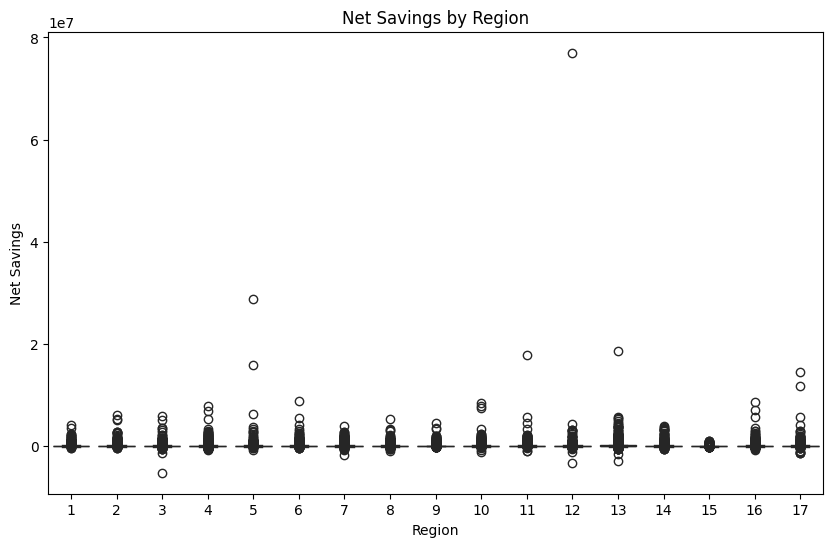

In [104]:
# Savings by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x="REGION", y="NET_SAVINGS", data=cleaned_fies, palette="viridis")
plt.title("Net Savings by Region")
plt.xlabel("Region")
plt.ylabel("Net Savings")
plt.show()


>**Analysis**: The box plot reveals significant disparities in net savings across different regions. While most regions show median net savings close to zero, there's considerable variation in the spread and outliers. Some regions display higher positive outliers, indicating individuals with substantially higher savings. However, the generally small interquartile ranges suggest that the majority of people in each region have similar, relatively low levels of net savings. The presence of both positive and negative outliers in most regions highlights the economic diversity within each area, with some individuals having high savings and others facing debt.

---

# Overall Insights

## Key Findings

1. **Income Inequality**: The analysis reveals significant income disparities across different social classes in the Philippines. The "Rich" category shows substantially higher and more varied incomes compared to other classes.

2. **Social Class Distribution**: The majority of households in the Philippines fall into the low income and poor classes, indicating prevalent poverty and income inequality issues.

3. **Regional Variations**: There are substantial regional differences in social class distribution. Some areas show a more diverse mix of income groups, while others are dominated by specific social classes.

4. **Urban vs. Rural Divide**: Rural areas tend to have higher proportions of poor and low-income groups, while urban areas demonstrate a more balanced distribution across various income levels.

5. **Expenses and Savings**: While income varies greatly across social classes, expenses don't increase as sharply. This leads to significant differences in net savings capacity, with lower income groups showing minimal savings potential and upper classes, especially the "Rich", displaying much higher median savings.

6. **Family Size**: Family size does not change significantly across social classes, except for the "Poor" category which shows some variation.

7. **Regional Demographics**: The National Capital Region (NCR) has the highest number of families, followed by Regions 3, 6, 15, and 8. Region 1 has the least number of families.

8. **Net Savings by Region**: There are significant disparities in net savings across different regions, with most regions showing median net savings close to zero but considerable variation in outliers.

## Implications

These findings highlight the complex socio-economic landscape of the Philippines, characterized by significant income inequality, regional disparities, and varying capacities for savings across different social classes. The data suggests a need for targeted economic policies and interventions to address poverty, promote more equitable income distribution, and enhance savings capacity, particularly in rural areas and among lower income groups.

## Future Directions

As noted in the project description, future stages of this analysis will include:

- Machine learning model implementation
- More comprehensive data analysis
- Advanced data visualization techniques
- Formulation of conclusions and recommendations based on the extended analysis

These additional steps will likely provide deeper insights into the factors influencing income distribution, savings behavior, and overall economic well-being across different segments of the Philippine population.

In [108]:
cleaned_fies.columns

Index(['REGION', 'PROVINCE', 'FAMILY_ID', 'FAMILY_SIZE', 'FOOD_EXPENSES',
       'OTHER_DISBURSEMENT', 'NON_FOOD_EXPENSES', 'TOTAL_INCOME',
       'TOTAL_EXPENSES', 'TOTAL_DISBURSEMENTS', 'OTHER_RECEIPTS',
       'TOTAL_RECEIPTS', 'AREA_CLASS', 'PCAPITA_INCOME', 'SOCIAL_CLASS',
       'NET_SAVINGS'],
      dtype='object')

In [109]:
income_df.columns

Index(['REG_SAL', 'SEASON_SAL', 'NET_SHARE', 'CASH_ABROAD', 'CASH_DOMESTIC',
       'RENTALS_REC', 'INTEREST', 'PENSION', 'DIVIDENDS',
       'OTHER_INCOME_SOURCE', 'NET_RECEIPT', 'GIFT_RECEIPTS', 'ENTREP_INCOME',
       'RENTVAL', 'TOTAL_INCOME'],
      dtype='object')

In [ ]:
%matplotlib inline

cleaned_fies['TOTAL_EXPENSES_RATIO'] = cleaned_fies['TOTAL_EXPENSES'] / cleaned_fies['TOTAL_RECEIPTS']
cleaned_fies['FOOD_EXPENSES_RATIO'] = cleaned_fies['FOOD_EXPENSES'] / cleaned_fies['TOTAL_EXPENSES']
cleaned_fies['NON_FOOD_EXPENSES_RATIO'] = cleaned_fies['NON_FOOD_EXPENSES'] / cleaned_fies['TOTAL_EXPENSES']
cleaned_fies['SAVINGS_RATIO'] = cleaned_fies['NET_SAVINGS'] / cleaned_fies['TOTAL_RECEIPTS']
cleaned_fies['PCAPITA_EXPENSES'] = cleaned_fies['TOTAL_EXPENSES'] / cleaned_fies['FAMILY_SIZE']
cleaned_fies['PCAPITA_FOOD_EXPENSES'] = cleaned_fies['FOOD_EXPENSES'] / cleaned_fies['FAMILY_SIZE']
cleaned_fies['PCAPITA_NON_FOOD_EXPENSES'] = cleaned_fies['NON_FOOD_EXPENSES'] / cleaned_fies['FAMILY_SIZE']

features = ['FAMILY_SIZE', 'FOOD_EXPENSES_RATIO', 'NON_FOOD_EXPENSES_RATIO', 
            'SAVINGS_RATIO', 'PCAPITA_EXPENSES', 'PCAPITA_FOOD_EXPENSES', 
            'PCAPITA_NON_FOOD_EXPENSES', 'AREA_CLASS', 'REGION', 'PROVINCE']

In [ ]:
X = cleaned_fies[features]
y = cleaned_fies['SOCIAL_CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# apply smote for handling class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# Compute class weights
class_weights = compute_class_weight('balanced', 
                                   classes=np.unique(y_train), 
                                   y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# Train improved model with class weights
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight=class_weight_dict,
    random_state=42
)

rf_model.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 1. Confusion Matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Improved Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
plt.close()

# 2. Feature Importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance (Improved Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.close()

# 3. Distribution of Social Classes
plt.figure(figsize=(12, 6))
sns.countplot(y='SOCIAL_CLASS', data=cleaned_fies, order=cleaned_fies['SOCIAL_CLASS'].value_counts().index)
plt.title('Distribution of Social Classes')
plt.xlabel('Count')
plt.ylabel('Social Class')
plt.savefig('social_class_distribution.png')
plt.close()

# 4. Savings Ratio by Social Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='SOCIAL_CLASS', y='SAVINGS_RATIO', data=cleaned_fies, order=cleaned_fies['SOCIAL_CLASS'].value_counts().index)
plt.title('Savings Ratio by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Savings Ratio')
plt.xticks(rotation=45)
plt.savefig('savings_ratio_by_class.png')
plt.close()

# 5. Food Expenses Ratio by Social Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='SOCIAL_CLASS', y='FOOD_EXPENSES_RATIO', data=cleaned_fies, order=cleaned_fies['SOCIAL_CLASS'].value_counts().index)
plt.title('Food Expenses Ratio by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Food Expenses Ratio')
plt.xticks(rotation=45)
plt.savefig('food_expenses_ratio_by_class.png')
plt.close()

# 5.5 Non-food Expenses Ratio by Social Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='SOCIAL_CLASS', y='NON_FOOD_EXPENSES_RATIO', data=cleaned_fies, order=cleaned_fies['SOCIAL_CLASS'].value_counts().index)
plt.title('Non-Food Expenses Ratio by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Non-Food Expenses Ratio')
plt.xticks(rotation=45)
plt.savefig('non_food_expenses_ratio_by_class.png')
plt.close()

# 6. Per Capita Expenses by Region
plt.figure(figsize=(14, 8))
sns.boxplot(x='REGION', y='PCAPITA_EXPENSES', data=cleaned_fies)
plt.title('Per Capita Expenses by Region')
plt.xlabel('Region')
plt.ylabel('Per Capita Expenses')
plt.xticks(rotation=45)
plt.savefig('per_capita_expenses_by_region.png')
plt.close()

# 7. Correlation Heatmap
correlation_features = ['FAMILY_SIZE', 'FOOD_EXPENSES_RATIO', 'NON_FOOD_EXPENSES_RATIO', 
                        'SAVINGS_RATIO', 'PCAPITA_EXPENSES', 'PCAPITA_FOOD_EXPENSES', 
                        'PCAPITA_NON_FOOD_EXPENSES']
correlation_matrix = cleaned_fies[correlation_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Key Features')
plt.tight_layout()
plt.savefig('correlation_heatmap_updated.png')
plt.close()


# 8. Family Size Distribution by Social Class
plt.figure(figsize=(12, 6))
sns.boxplot(x='SOCIAL_CLASS', y='FAMILY_SIZE', data=cleaned_fies, order=cleaned_fies['SOCIAL_CLASS'].value_counts().index)
plt.title('Family Size Distribution by Social Class')
plt.xlabel('Social Class')
plt.ylabel('Family Size')
plt.xticks(rotation=45)
plt.savefig('family_size_by_class.png')
plt.close()

Classification Report:
                     precision    recall  f1-score   support

         Low income       0.97      0.80      0.88     13552
Lower-middle income       0.79      0.83      0.81      7607
      Middle income       0.58      0.88      0.69      2158
               Poor       0.90      0.97      0.94      8651
               Rich       0.70      0.52      0.60        44
       Upper income       0.58      0.74      0.65       107
Upper-middle income       0.61      0.86      0.72       535

           accuracy                           0.86     32654
          macro avg       0.73      0.80      0.75     32654
       weighted avg       0.88      0.86      0.86     32654

